## KNN- Diabates

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions


In [2]:
dataset = pd.read_csv(r'C:\Users\surfacepro\.ipython\diabetes.csv')

In [3]:
dataset.shape



(768, 9)

In [4]:
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
mean = (dataset['Glucose'].loc[dataset['Glucose'] != 0]).mean()
mean

121.6867627785059

In [6]:
mean1 = (dataset['BloodPressure'].loc[dataset['BloodPressure'] != 0]).mean()
mean1

72.40518417462484

In [7]:
mean2 = (dataset['SkinThickness'].loc[dataset['SkinThickness'] != 0]).mean()
mean2

29.153419593345657

In [8]:
mean3 = (dataset['Insulin'].loc[dataset['Insulin'] != 0]).mean()
mean3

155.5482233502538

In [9]:
mean4 = (dataset['BMI'].loc[dataset['BMI'] != 0]).mean()
mean4

32.45746367239099

In [10]:
#Replacing zero's with the mean
dataset=dataset.replace({'Insulin': {0: mean3}}) 

In [11]:
dataset=dataset.replace({'BMI': {0: mean4}}) 

In [12]:
dataset=dataset.replace({'BloodPressure': {0: mean1}}) 

In [13]:
dataset=dataset.replace({'Glucose': {0: mean}}) 

In [14]:
dataset=dataset.replace({'SkinThickness': {0: mean2}}) 

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
#Within the data set looking at the ilocation of all rows and only rows 0-7
X = dataset.iloc[:, 0:8]
#y is the outcome so selection just column 8
y = dataset.iloc [: , 8]
 
X_train , X_test , y_train ,  y_test = train_test_split(X, y,
                                                 test_size = 0.20, 
                                                 random_state = 0)


In [18]:
#Any algorithm that computes distance or assumes normality it is important to scale features 
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
#Finding the best value of K
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

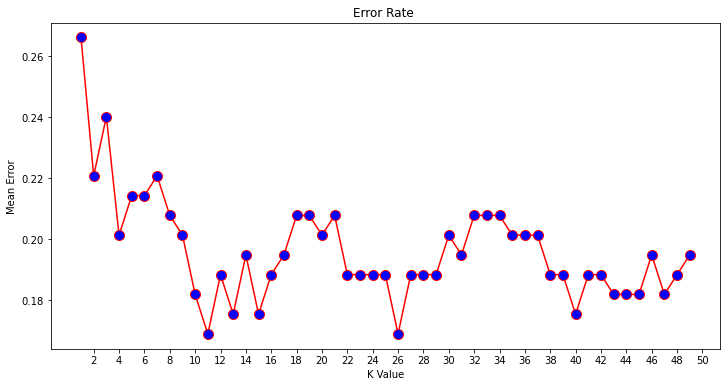

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])
plt.title('Error Rate ')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [47]:
#Comparing different values for K
def knn_comparison(data, k):
 x = dataset[['BMI','Glucose']].values
 y = dataset['Outcome'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=1)
# Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()

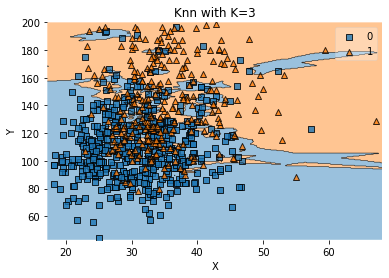

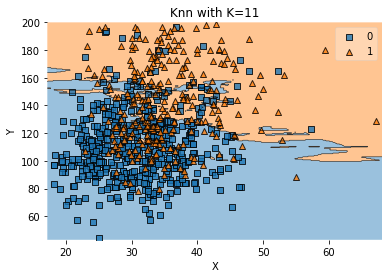

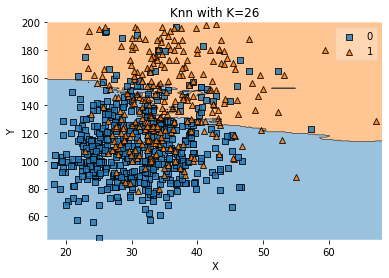

In [48]:
for i in [3,11,26]:
    knn_comparison(dataset, i)

In [22]:
#Define the model

classifier = KNeighborsClassifier(n_neighbors = 11, p=2, metric= 'euclidean')


In [23]:
classifier.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [24]:
classifier.score(X_test, y_test)

0.8311688311688312

In [25]:

y_pred = classifier.predict(X_test)


In [26]:
cm = confusion_matrix( y_test, y_pred)
cm

array([[94, 13],
       [13, 34]], dtype=int64)